In [63]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from ggplot import *
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import metrics


# Display for notebooks
%matplotlib inline

# Load the training data datasets
data1 = pd.read_csv("1year.csv")
data1['category'] = np.where(data1['class']==0, 0, 2)

data2 = pd.read_csv("csv_result-2year.csv")
data2['category'] = np.where(data2['class']==0, 0, 2)
del data2['id']

data3 = pd.read_csv("csv_result-3year.csv")
data3['category'] = np.where(data3['class']==0, 0, 2)
del data3['id']

data4 = pd.read_csv("csv_result-4year.csv")
data4['category'] = np.where(data4['class']==0, 0, 1)
del data4['id']

data5 = pd.read_csv("csv_result-5year.csv")
data5['category'] = np.where(data5['class']==0, 0, 1)
del data5['id']

# Success - Display the first record, just for a sense check
display(data1.head(n=1))
display(data2.head(n=1))
display(data3.head(n=1))
display(data4.head(n=1))
display(data5.head(n=1))

# Concatenate the 5 datasets into a single one
dataset = pd.concat([data1,data2,data3,data4,data5])


dataset.replace({'?': 0}, inplace=True)
dataset = dataset.replace(0, np.NaN)

# CEnsure there are no NULLs in the target column and delete the original class column
dataset['category'] = dataset['category'].replace(np.NaN,0)
del dataset['class']

# Add columns names
dataset.columns = [

'Col1_net_profit_div_total_assets',
'Col2_total_liabilities_div_total_assets',
'Col3_working_capital_div_total_assets',
'Col4_current_assets_div_short-term_liabilities',
'Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365',
'Col6_retained_earnings_div_total_assets',
'Col7_EBIT_div_total_assets',
'Col8_book_value_of_equity_div_total_liabilities',
'Col9_sales_div_total_assets',
'Col10_equity_div_total_assets',
'Col11_(gross_profit_plus_extraordinary_items_plus_financial_expenses)_div_total_assets',
'Col12_gross_profit_div_short-term_liabilities',
'Col13_(gross_profit_plus_depreciation)_div_sales',
'Col14_(gross_profit_plus_interest)_div_total_assets',
'Col15_(total_liabilities_*_365)_div_(gross_profit_plus_depreciation)',
'Col16_(gross_profit_plus_depreciation)_div_total_liabilities',
'Col17_total_assets_div_total_liabilities',
'Col18_gross_profit_div_total_assets',
'Col19_gross_profit_div_sales',
'Col20_(inventory_*_365)_div_sales',
'Col21_sales_(n)_div_sales_(n-1)',
'Col22_profit_on_operating_activities_div_total_assets',
'Col23_net_profit_div_sales',
'Col24_gross_profit_(in_3_years)_div_total_assets',
'Col25_(equity_-_share_capital)_div_total_assets',
'Col26_(net_profit_plus_depreciation)_div_total_liabilities',
'Col27_profit_on_operating_activities_div_financial_expenses',
'Col28_working_capital_div_fixed_assets',
'Col29_logarithm_of_total_assets',
'Col30_(total_liabilities_-_cash)_div_sales',
'Col31_(gross_profit_plus_interest)_div_sales',
'Col32_(current_liabilities_*_365)_div_cost_of_products_sold',
'Col33_operating_expenses_div_short-term_liabilities',
'Col34_operating_expenses_div_total_liabilities',
'Col35_profit_on_sales_div_total_assets',
'Col36_total_sales_div_total_assets',
'Col37_(current_assets_-_inventories)_div_long-term_liabilities',
'Col38_constant_capital_div_total_assets',
'Col39_profit_on_sales_div_sales',
'Col40_(current_assets_-_inventory_-_receivables)_div_short-term_liabilities',
'Col41_total_liabilities_div_((profit_on_operating_activities_plus_depreciation)_*_(12div365))',
'Col42_profit_on_operating_activities_div_sales',
'Col43_rotation_receivables_plus_inventory_turnover_in_days',
'Col44_(receivables_*_365)_div_sales',
'Col45_net_profit_div_inventory',
'Col46_(current_assets_-_inventory)_div_short-term_liabilities',
'Col47_(inventory_*_365)_div_cost_of_products_sold',
'Col48_EBITDA_(profit_on_operating_activities_-_depreciation)_div_total_assets',
'Col49_EBITDA_(profit_on_operating_activities_-_depreciation)_div_sales',
'Col50_current_assets_div_total_liabilities',
'Col51_short-term_liabilities_div_total_assets',
'Col52_(short-term_liabilities_*_365)_div_cost_of_products_sold)',
'Col53_equity_div_fixed_assets',
'Col54_constant_capital_div_fixed_assets',
'Col55_working_capital',
'Col56_(sales_-_cost_of_products_sold)_div_sales',
'Col57_(current_assets_-_inventory_-_short-term_liabilities)_div_(sales_-_gross_profit_-_depreciation)',
'Col58_total_costs_divtotal_sales',
'Col59_long-term_liabilities_div_equity',
'Col60_sales_div_inventory',
'Col61_sales_div_receivables',
'Col62_(short-term_liabilities_*365)_div_sales',
'Col63_sales_div_short-term_liabilities',
'Col64_sales_div_fixed_assets',
    'category'
]


# Profile the number of NULLs in each feature
print(dataset.isnull().sum())



,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.20235,0.465,0.24038,1.5171,-14.547,0.51069,0.25366,0.91816,1.1519,0.42695,...,0.47395,0.86816,0.00023951,8.5487,5.1655,107.74,3.3879,5.344,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.17419,0.41299,0.14371,1.348,-28.982,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.15929,0.4624,0.07773,1.1683,-44.853,0.46702,0.18948,0.82895,1.1223,0.3833,...,0.41557,0.89101,0.001422,7.7928,4.9914,119.81,3.0465,3.056,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,...,0.27543,0.91905,0.002024,7.2711,4.7343,142.76,2.5568,3.2597,0,0


Col1_net_profit_div_total_assets                                                                                                       84
Col2_total_liabilities_div_total_assets                                                                                                25
Col3_working_capital_div_total_assets                                                                                                  10
Col4_current_assets_div_short-term_liabilities                                                                                        134
Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365       89
Col6_retained_earnings_div_total_assets                                                                                              6067
Col7_EBIT_div_total_assets                                                                                                             20
Col8_book_value_of_equity_div_tota

In [64]:
# Sense check number of rows and columns
dataset.shape

(43405, 65)

In [65]:
# Creation of new columns
dataset['NaNCount'] = len(dataset.columns) - dataset.count(axis=1)
dataset['isblank-profit_on_operating_activities_div_financial_expenses'] = np.where((dataset['Col27_profit_on_operating_activities_div_financial_expenses'] > 0), 1, 0)
dataset['isblank-Col21_sales_(n)_div_sales_(n-1)'] = np.where((dataset['Col21_sales_(n)_div_sales_(n-1)'] > 0), 1, 0)
dataset['isblank-Col6_retained_earnings_div_total_assets'] = np.where((dataset['Col6_retained_earnings_div_total_assets'] > 0), 1, 0)
#dataset['isblank-Col59_long-term_liabilities_div_equity'] = np.where((dataset['Col59_long-term_liabilities_div_equity'] > 0), 1, 0)

In [66]:
display(dataset.head(n=10))

,Col1_net_profit_div_total_assets,Col2_total_liabilities_div_total_assets,Col3_working_capital_div_total_assets,Col4_current_assets_div_short-term_liabilities,Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365,Col6_retained_earnings_div_total_assets,Col7_EBIT_div_total_assets,Col8_book_value_of_equity_div_total_liabilities,Col9_sales_div_total_assets,Col10_equity_div_total_assets,...,Col60_sales_div_inventory,Col61_sales_div_receivables,Col62_(short-term_liabilities_*365)_div_sales,Col63_sales_div_short-term_liabilities,Col64_sales_div_fixed_assets,category,NaNCount,isblank-profit_on_operating_activities_div_financial_expenses,isblank-Col21_sales_(n)_div_sales_(n-1),isblank-Col6_retained_earnings_div_total_assets
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,8.416,5.1372,82.658,4.4158,7.4277,0.0,0,1,1,1
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,4.1486,3.2732,107.35,3.4,60.987,0.0,2,1,1,1
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,4.9909,3.951,134.27,2.7185,5.2078,0.0,1,1,1,1
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,4.5746,3.6147,86.435,4.2228,5.5497,0.0,1,1,1,1
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,6.3985,4.3158,127.21,2.8692,7.898,0.0,1,1,0,1
5,0.22822,0.49794,0.35969,1.7502,-47.717,0,0.28139,1.0083,1.9786,0.50206,...,3.4028,8.9949,88.444,4.1269,12.299,0.0,1,1,1,1
6,0.11109,0.64744,0.28971,1.4705,2.5349,0,0.11109,0.54454,1.7348,0.35256,...,6.3222,2.9098,129.55,2.8173,18.352,0.0,3,1,1,1
7,0.53232,0.027059,0.70554,53.954,299.58,0,0.6524,35.957,0.65273,0.97294,...,9.13,82.05,7.4503,48.991,2.3217,0.0,2,1,0,1
8,0.00902,0.63202,0.053735,1.1263,-37.842,0,0.014434,0.58223,1.3332,0.36798,...,9.9665,4.2382,116.5,3.133,2.5603,0.0,0,1,1,1
9,0.12408,0.83837,0.14204,1.1694,-91.883,0,0.15328,0.19279,2.1156,0.16163,...,3.3192,6.4994,144.63,2.5236,107.67,0.0,2,1,1,1


In [68]:
# Check what % of rows are blank, by class, for key columns
dataset[['Col6_retained_earnings_div_total_assets', 'category','Col21_sales_(n)_div_sales_(n-1)'
,'Col22_profit_on_operating_activities_div_total_assets'
,'Col27_profit_on_operating_activities_div_financial_expenses'
,'Col37_(current_assets_-_inventories)_div_long-term_liabilities'
,'Col45_net_profit_div_inventory'
,'Col59_long-term_liabilities_div_equity'
,'Col60_sales_div_inventory']].groupby("category").apply(lambda x: x.isnull().mean())

,Col6_retained_earnings_div_total_assets,category,Col21_sales_(n)_div_sales_(n-1),Col22_profit_on_operating_activities_div_total_assets,Col27_profit_on_operating_activities_div_financial_expenses,Col37_(current_assets_-_inventories)_div_long-term_liabilities,Col45_net_profit_div_inventory,Col59_long-term_liabilities_div_equity,Col60_sales_div_inventory
category,,,,,,,,,
0.0,0.134918,0.0,0.126809,0.030353,0.049596,0.435857,0.047708,0.215327,0.047829
1.0,0.200000,0.0,0.229189,0.001081,0.299459,0.507027,0.098378,0.002162,0.098378
2.0,0.264151,0.0,0.345626,0.000000,0.375643,0.435678,0.072899,0.345626,0.072899


In [69]:
# Check average number of missing columns per class
missingprofiling = dataset.groupby('category')['NaNCount'].mean()
print missingprofiling

category
0.0    1.369681
1.0    1.843243
2.0    2.238422
Name: NaNCount, dtype: float64


In [8]:
#print (max(dataset['isblank-profit_on_operating_activities_div_financial_expenses']))

#print dataset[['isblank-profit_on_operating_activities_div_financial_expenses', 'category']].groupby("category").apply(lambda x: x.isnull().mean())

In [70]:
ds = dataset
print(ds.isnull().sum())


Col1_net_profit_div_total_assets                                                                                                      84
Col2_total_liabilities_div_total_assets                                                                                               25
Col3_working_capital_div_total_assets                                                                                                 10
Col4_current_assets_div_short-term_liabilities                                                                                       134
Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365      89
Col6_retained_earnings_div_total_assets                                                                                             6067
Col7_EBIT_div_total_assets                                                                                                            20
Col8_book_value_of_equity_div_total_liabi

In [71]:
# Test 1 - remove columns with high number of NaNs
#del ds['Col6_retained_earnings_div_total_assets']
#del ds['Col21_sales_(n)_div_sales_(n-1)']
#del ds['Col22_profit_on_operating_activities_div_total_assets']
#del ds['Col27_profit_on_operating_activities_div_financial_expenses']
#del ds['Col37_(current_assets_-_inventories)_div_long-term_liabilities']
#del ds['Col45_net_profit_div_inventory']
#del ds['Col59_long-term_liabilities_div_equity']
#del ds['Col60_sales_div_inventory']

# Test 2 - remove columns with little impact
#del ds['Col3_working_capital_div_total_assets']
#del ds['Col4_current_assets_div_short-term_liabilities']
#del ds['Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365']
#del ds['Col6_retained_earnings_div_total_assets']
#del ds['Col9_sales_div_total_assets']
#del ds['Col11_(gross_profit_plus_extraordinary_items_plus_financial_expenses)_div_total_assets']
#del ds['Col12_gross_profit_div_short-term_liabilities']
#del ds['Col13_(gross_profit_plus_depreciation)_div_sales']
#del ds['Col14_(gross_profit_plus_interest)_div_total_assets']
#del ds['Col17_total_assets_div_total_liabilities']
#del ds['Col19_gross_profit_div_sales']
#del ds['Col20_(inventory_*_365)_div_sales']
#del ds['Col23_net_profit_div_sales']
#del ds['Col25_(equity_-_share_capital)_div_total_assets']
#del ds['Col26_(net_profit_plus_depreciation)_div_total_liabilities']
#del ds['Col27_profit_on_operating_activities_div_financial_expenses']
#del ds['Col28_working_capital_div_fixed_assets']
#del ds['Col29_logarithm_of_total_assets']
#del ds['Col30_(total_liabilities_-_cash)_div_sales']
#del ds['Col31_(gross_profit_plus_interest)_div_sales']
#del ds['Col32_(current_liabilities_*_365)_div_cost_of_products_sold']
#del ds['Col33_operating_expenses_div_short-term_liabilities']
#del ds['Col34_operating_expenses_div_total_liabilities']
#del ds['Col36_total_sales_div_total_assets']
#del ds['Col37_(current_assets_-_inventories)_div_long-term_liabilities']
#del ds['Col40_(current_assets_-_inventory_-_receivables)_div_short-term_liabilities']
#del ds['Col41_total_liabilities_div_((profit_on_operating_activities_plus_depreciation)_*_(12div365))']
#del ds['Col43_rotation_receivables_plus_inventory_turnover_in_days']
#del ds['Col44_(receivables_*_365)_div_sales']
#del ds['Col45_net_profit_div_inventory']
#del ds['Col47_(inventory_*_365)_div_cost_of_products_sold']
#del ds['Col48_EBITDA_(profit_on_operating_activities_-_depreciation)_div_total_assets']
#del ds['Col49_EBITDA_(profit_on_operating_activities_-_depreciation)_div_sales']
#del ds['Col50_current_assets_div_total_liabilities']
#del ds['Col52_(short-term_liabilities_*_365)_div_cost_of_products_sold)']


# 1 - drop rows with NaNs
#ds.dropna(inplace=True)

# 2 - Set Nans to 0
ds = ds.fillna(0)

# 3 - Set Nans to mean
#ds = ds.fillna(ds.mean(), inplace=True)

In [72]:
# Set the target class and then delete the column from the training data
target = ds['category']
del ds['category']

In [73]:
x = ds.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled)

# features = ds

In [78]:
print features

             0         1         2         3         4         5         6   \
0      0.831450  0.472949  0.945033  0.000046  0.904960  0.483805  0.443752   
1      0.831466  0.473081  0.945182  0.000044  0.904959  0.483436  0.443759   
2      0.831536  0.473296  0.944778  0.000037  0.904958  0.483436  0.443803   
3      0.831237  0.472870  0.945156  0.000054  0.904962  0.483578  0.443617   
4      0.831426  0.473206  0.944705  0.000034  0.904957  0.483614  0.443698   
5      0.831500  0.473079  0.944961  0.000040  0.904954  0.483436  0.443779   
6      0.831290  0.473243  0.944823  0.000035  0.904958  0.483436  0.443633   
7      0.832045  0.472563  0.945641  0.001017  0.904981  0.483436  0.444097   
8      0.831107  0.473226  0.944359  0.000029  0.904955  0.483436  0.443550   
9      0.831313  0.473453  0.944532  0.000029  0.904951  0.483436  0.443669   
10     0.831521  0.473020  0.944624  0.000034  0.904956  0.482550  0.443744   
11     0.831042  0.472656  0.944489  0.000046  0.904

In [79]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 34724 samples.
Testing set has 8681 samples.


In [80]:
# Random prediction, for benchmarking reasons
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)  

predictions_random = dummy_classifier.predict(X_test)

print accuracy_score(predictions_random, y_test) 
print f1_score(predictions_random, y_test, average='macro')  

# Normalising/scaling all features & replacing NaNs with zeros - 0.325492739099

print(classification_report(y_test, predictions_random, target_names=['0','1','2']))

0.90726874784
0.334854927931
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      8282
          1       0.03      0.03      0.03       184
          2       0.02      0.03      0.03       215

avg / total       0.91      0.91      0.91      8681



In [16]:
# Function for training out of the box algorithms
def getF1score(algo):
    
    # Train the algorithm
    algo.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = algo.predict(X_test)

    # Return the F1 score
    return f1_score(predictions, y_test, average='macro') 

In [109]:
# Get F1 scores for each out of the box algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = RandomForestClassifier(random_state=0)
print ("Random forest:")
print (getF1score(clf))

dtree = tree.DecisionTreeClassifier(random_state=0)
print ("")
print ("Decision tree:")
print (getF1score(dtree))

mul_lr = linear_model.LogisticRegression(random_state=0)
print ("")
print ("Logistic regression:")
print (getF1score(mul_lr))

gbc = GradientBoostingClassifier(random_state=0)
print ("")
print ("Gradient boosting:")
print (getF1score(gbc))

knn = KNeighborsClassifier()
print ("")
print ("KNN:")
print (getF1score(knn))

Random forest:
0.47558338378

Decision tree:
0.503670306118

Logistic regression:
0.339115153864

Gradient boosting:
0.522511115428

KNN:
0.435969431033


In [18]:
# Function to test different parameter values for a given algorithm
from sklearn.grid_search import GridSearchCV

def getbestparameters(params, model_to_tune):
    
    parameters = params 

    grid = GridSearchCV(model_to_tune, param_grid=params, scoring='f1_macro',n_jobs=1)
    grid = grid.fit(X_train, y_train)
    
    return grid.best_estimator_.get_params()

/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [107]:
# Random forest classifier - tune parameters
clf = RandomForestClassifier(random_state=0)
paramstotry = {'max_depth': [1,5,20,50,100],
               'min_samples_leaf': [1,5,10,15,20],
               'n_estimators': range(1,5)}
               # 'max_features': ['auto','sqrt']}

best_parameters = getbestparameters(paramstotry, clf)

for param_name in sorted(paramstotry.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

	max_depth: 50
	min_samples_leaf: 1
	n_estimators: 4


In [25]:
# Train the random forest classifier
clf = RandomForestClassifier(random_state=3,
                             max_depth=8,
                             max_features='auto',
                             min_samples_leaf=5,
                             n_estimators=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print ("Performance:")
print accuracy_score(predictions, y_test) 
print f1_score(predictions, y_test, average='macro')  

Performance:
0.950120953807
0.4396458196


In [36]:
# Decision Tree - test parameters
dtree = tree.DecisionTreeClassifier(random_state=0)
paramstotry = {'max_depth': range(1,11),
               'min_samples_leaf': range(1,11),
               'min_samples_split': range(2,6)}

best_parameters = getbestparameters(paramstotry, dtree)

for param_name in sorted(paramstotry.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

	max_depth: 10
	min_samples_leaf: 1
	min_samples_split: 3


In [37]:
# Decision Tree - train and test
dtree = tree.DecisionTreeClassifier(random_state=0, 
                                    min_samples_leaf=1, 
                                    max_depth=10,
                                    min_samples_split= 3)
dtree.fit(X_train, y_train)

predictions_dtree = dtree.predict(X_test)

print accuracy_score(predictions_dtree, y_test) 
print f1_score(predictions_dtree, y_test, average='macro')  

0.959566870176
0.541566868695


In [ ]:
# Logistic Regression - tune parameters
mul_lr = linear_model.LogisticRegression(random_state=0)

paramstotry = {'solver': ['newton-cg', 'lbfgs', 'sag'],
               'multi_class': ['ovr', 'multinomial'],
               'class_weight': [None, 'balanced'],
               'max_iter': [1,5,10,15,20]}

best_parameters = getbestparameters(paramstotry, mul_lr)

for param_name in sorted(paramstotry.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

In [63]:
# Logistic Regression - newton solver
mul_lr = linear_model.LogisticRegression(multi_class='ovr', 
                                         solver='newton-cg',
                                         class_weight= 'balanced',
                                         max_iter = 3,
                                         random_state=0).fit(X_train, y_train)

print metrics.accuracy_score(y_test, mul_lr.predict(X_test))
print f1_score(mul_lr.predict(X_test), y_test, average='macro')  

print(classification_report(y_test, mul_lr.predict(X_test), target_names=['0','1','2']))

0.747724916484
0.367283918508
             precision    recall  f1-score   support

          0       0.98      0.77      0.86      8282
          1       0.09      0.27      0.13       184
          2       0.06      0.47      0.11       215

avg / total       0.94      0.75      0.83      8681



In [52]:
# Gradient boosting - tune parameters
gbc = GradientBoostingClassifier(random_state=0)

paramstotry = {'min_samples_split': [20,50,100,200,500,1000],
               'min_samples_leaf': [20,50,100,150],
               'max_depth': [4, 6, 8]}

best_parameters = getbestparameters(paramstotry, gbc)

for param_name in sorted(paramstotry.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

	max_depth: 8
	min_samples_leaf: 20
	min_samples_split: 200


In [ ]:
# Gradient Boosting
gbc = GradientBoostingClassifier(random_state=0)

gbc.fit(X_train, y_train)

predictions_regr = gbc.predict(X_test)

print accuracy_score(predictions_regr, y_test) 
print f1_score(predictions_regr, y_test, average='macro')  

print(classification_report(y_test, predictions_regr, target_names=['0','1','2']))

In [51]:
# KNN - tune parameters
knn = KNeighborsClassifier()

paramstotry = {'n_neighbors': [2,4,8,10,15],
               'algorithm': ['auto','ball_tree', 'kd_tree'],
               'weights': ['uniform', 'distance']}

best_parameters = getbestparameters(paramstotry, knn)

for param_name in sorted(paramstotry.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

	algorithm: 'auto'
	n_neighbors: 4
	weights: 'distance'


In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

print accuracy_score(predictions_knn, y_test) 
print f1_score(predictions_knn, y_test, average='macro')  

# Removing rows with blanks. Keeping columns with little impact = 0.328851933655
# Removing rows with blanks. Removing columns with little impact = 0.32454753119
# Removing rows with blanks. Keeping columns with little impact. Replacing NaN with 0 = 0.328977557403

# Normalising/scaling all features & replacing NaNs with zeros - 0.438035521333

print(classification_report(y_test, predictions_knn, target_names=['0','1','2']))

In [110]:
# Get F1 scores for each of the tuned algorithms

clf = RandomForestClassifier(random_state=0,
                             max_depth=50,
                             max_features='auto',
                             min_samples_leaf=1,
                             n_estimators=4)
print ("Random forest:")
print (getF1score(clf))

dtree = tree.DecisionTreeClassifier(random_state=0, 
                                    min_samples_leaf=1, 
                                    max_depth=10,
                                    min_samples_split= 3)
print ("")
print ("Decision tree:")
print (getF1score(dtree))

mul_lr = linear_model.LogisticRegression(multi_class='ovr', 
                                         solver='newton-cg',
                                         class_weight= 'balanced',
                                         max_iter = 3,
                                         random_state=0)
print ("")
print ("Logistic regression:")
print (getF1score(mul_lr))

gbc = GradientBoostingClassifier(random_state=0,
                                 criterion='friedman_mse',
                                 max_depth=8,
                                 min_samples_leaf=20,
                                 min_samples_split=200)

print ("")
print ("Gradient boosting:")
print (getF1score(gbc))

knn = KNeighborsClassifier(algorithm ='auto',
                           n_neighbors = 4,
                           weights = 'distance')
print ("")
print ("KNN:")
print (getF1score(knn))

Random forest:
0.462317124793

Decision tree:
0.541566868695

Logistic regression:
0.367283918508

Gradient boosting:
0.548928671081

KNN:
0.453428474009


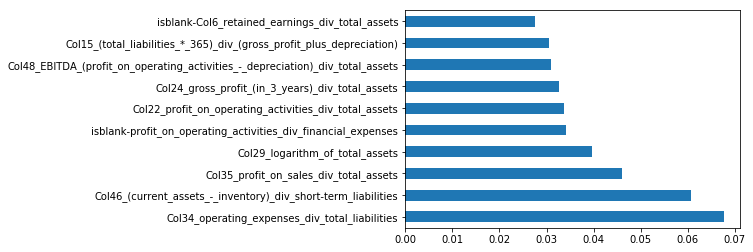

In [84]:
# Show the feature importance, for the winning algorithm
feature_importances = pd.Series(gbc.feature_importances_, index=ds.columns)
feature_importances = feature_importances.nlargest(10)
feature_importances.plot(kind='barh')

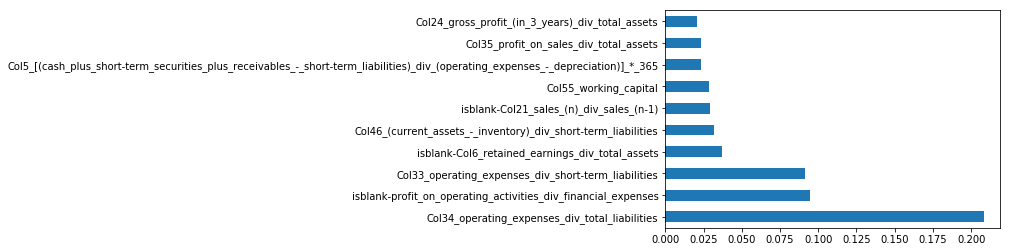

In [91]:
# Show the feature importance, for the decision tree algorithm
feature_importances = pd.Series(dtree.feature_importances_, index=ds.columns)
feature_importances = feature_importances.nlargest(10)
feature_importances.plot(kind='barh')

1. feature 33 (0.067750)
2. feature 45 (0.060605)
3. feature 34 (0.046008)
4. feature 28 (0.039769)
5. feature 65 (0.034161)
6. feature 21 (0.033709)
7. feature 23 (0.032603)
8. feature 47 (0.031048)
9. feature 14 (0.030549)
10. feature 67 (0.027564)
11. feature 5 (0.025041)
12. feature 24 (0.022871)
13. feature 8 (0.022685)
14. feature 64 (0.022015)
15. feature 60 (0.021430)
16. feature 58 (0.021213)
17. feature 37 (0.021146)
18. feature 32 (0.020860)
19. feature 54 (0.020488)
20. feature 56 (0.018912)
21. feature 10 (0.017459)
22. feature 4 (0.016924)
23. feature 2 (0.015503)
24. feature 35 (0.015263)
25. feature 63 (0.014924)
26. feature 20 (0.014850)
27. feature 36 (0.014610)
28. feature 26 (0.014558)
29. feature 39 (0.013881)
30. feature 31 (0.013732)
31. feature 50 (0.013207)
32. feature 52 (0.012781)
33. feature 0 (0.012705)
34. feature 27 (0.011514)
35. feature 41 (0.011001)
36. feature 38 (0.009866)
37. feature 9 (0.008370)
38. feature 40 (0.007991)
39. feature 25 (0.007912)
4

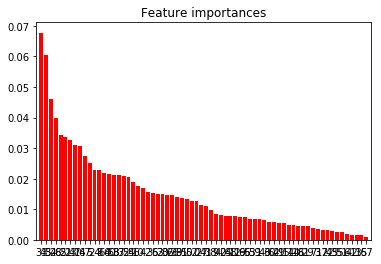

In [103]:
import matplotlib.pyplot as plt

importances = gbc.feature_importances_
std = np.std([gbc.feature_importances_ for tree in gbc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()